<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment04** #

Name : 이현주

Student # : 20184060

# **1. Plot the estimated parameters using the training dataset [3pt]**

- plot the estimated parameters {(θ0,θ1,θ2,θ3)} at every iteration of gradient descent until convergence

- the colors for the parameters {(θ0,θ1,θ2,θ3)} should be black, red, green, blue, respectively

- the optimization is performed using the training dataset ('data_train.csv')

In [429]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
# from google.colab import files

# uploaded = files.upload()

train_point = [[0]*3 for i in range(300)]
test_point = [[0]*4 for i in range(300)]
y = [[0]*1 for i in range(300)]

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        # train_point[ct][0] = 1
        # train_point[ct][1] = i[0]
        # train_point[ct][2] = i[1]
        # train_point[ct][3] = i[2]
        train_point[ct][0] = i[0]
        train_point[ct][1] = i[1]
        train_point[ct][2] = i[2]
        y[ct][0] = i[3]
        ct += 1

y = np.array(y,dtype=float)
print(y)

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        test_point[ct][0] = i[0]
        test_point[ct][1] = i[1]
        test_point[ct][2] = i[2]
        test_point[ct][3] = i[3]
        ct += 1


[[ 73.57882491]
 [-56.41043334]
 [ 52.39076825]
 [ -6.93629528]
 [-34.99701708]
 [-19.85473504]
 [  4.6693089 ]
 [ 20.32729691]
 [-96.11724036]
 [ 29.87851202]
 [ 42.21994908]
 [ 88.95764271]
 [ 48.77575822]
 [ 66.50231593]
 [ -6.16781026]
 [ 15.49724783]
 [ 31.88174211]
 [ 33.20844246]
 [ 45.45331174]
 [ 33.16918589]
 [122.93325825]
 [139.82142837]
 [ 35.40409479]
 [117.60105188]
 [ 50.15151245]
 [ 58.81526789]
 [120.24022092]
 [109.0756897 ]
 [ 97.70452838]
 [185.96588166]
 [ 95.01946318]
 [ 78.87463324]
 [ 67.30467176]
 [ 79.75809264]
 [ 74.10755613]
 [ 83.82484147]
 [178.74529641]
 [ 88.63800975]
 [140.72337571]
 [195.77509174]
 [ 79.67465512]
 [152.83421688]
 [167.4089796 ]
 [184.97748046]
 [ 95.67944538]
 [185.75272015]
 [157.93001788]
 [164.49518202]
 [184.57270124]
 [198.42097112]
 [155.43387808]
 [205.65335771]
 [156.92145016]
 [ 87.02646629]
 [218.61381028]
 [117.49062022]
 [129.64197064]
 [228.38692079]
 [165.91979145]
 [226.03910288]
 [125.90149994]
 [138.13709291]
 [241.17

In [430]:
X = train_point

print(X)
print(test_point)

[['0.27354771453665605', '-8.932101598046074', '18.70868394492699'], ['5.403327323126673', '4.782976500936417', '-18.76220985503919'], ['0.029941312523676267', '-3.2459156984821025', '6.9324982114247895'], ['3.047974457680872', '0.7152107112924928', '-1.9654187170206976'], ['1.3020743188547064', '-5.871807382211632', '-15.702181352019878'], ['0.48067768765626884', '-2.9117619875044713', '-2.3631235358529112'], ['1.6315020736136816', '9.399052248888598', '2.47547991106324'], ['6.373997103111523', '16.58421457152967', '17.896253239300936'], ['7.003140610383589', '17.425389177900183', '-11.921952696244727'], ['11.816393974825985', '10.214779306945674', '9.041430521640162'], ['6.927811569347049', '0.7843660805950918', '9.93081792640163'], ['14.655972384212781', '12.205413139643902', '20.883114852804475'], ['11.937986482955866', '11.016356618711532', '16.55104779881705'], ['15.549856868263298', '11.397772275507558', '17.2565714937523'], ['14.94482857356449', '19.389573769448283', '3.0215183

In [0]:
# X_b = np.c_[np.ones((300,4)),X]
# X_b=np.array(X_b,dtype=float)
# y=np.array(y, dtype=float)
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# print(theta_best)

In [0]:
# X_new = np.array([[0],[2]])
# X_new_b = np.c_[np.ones((2,1)),X_new]
# print(X_new_b.shape)
# print(X_new)
# y_predict = X_new_b.dot(theta_best)

# y_predict

In [0]:

def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    # print(X)
    # print(theta)

    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost


In [0]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=1000):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    # theta[0][0] = 1
    # theta[1][0] = 1
    # theta[2][0] = 1
    # theta[3][0] = 1
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,4))
    for it in range(iterations):
        # X = np.array(X,dtype=float)
        # theta = np.array(theta,dtype=float)
        
        # prediction = np.dot(X,theta)

        # print(prediction.shape)
        # print(X.shape)
        # print(theta.shape)

        # tmp0 = theta[0][m]
        # tmp1 = theta[1][m]
        # tmp2 = theta[2][m]
        # tmp3 = theta[3][m]

        pred0 = 0
        pred1 = 0
        pred2 = 0
        pred3 = 0

        for i in range(0, m):
          # print(i)
          pred0 = pred0 + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*X[i][0]
          pred1 = pred1 + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*X[i][1]
          pred2 = pred2 + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*X[i][2]
          pred3 = pred3 + (theta[0][it]*X[i][0] + theta[1][it]*X[i][1] + theta[2][it]*X[i][2] + theta[3][it]*X[i][3] - y[i][0])*X[i][3]
        
        # print(it)
        theta[0][it + 1] = theta[0][it] - (1/m)*learning_rate*pred0
        theta[1][it + 1] = theta[1][it] - (1/m)*learning_rate*pred1
        theta[2][it + 1] = theta[2][it] - (1/m)*learning_rate*pred2
        theta[3][it + 1] = theta[3][it] - (1/m)*learning_rate*pred3
        # theta = theta - (1/m)*learning_rate*( X.T.dot((prediction - y)))

        theta_history[it][0] = theta[0][it]
        # theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
    

In [435]:
lr =0.01
n_iter = 1000

theta = np.random.randn(4,n_iter + 1)
# print(theta)

X_b = np.c_[np.ones((len(X),1)),X]
X_b = np.array(X_b,dtype=float)
print(X_b.shape)
print(X_b.dtype)
print(y.dtype)
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

print(theta[1])

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

(300, 4)
float64
float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-pac

[-2.18633987e-01  1.42897572e+02 -1.28444280e+05 ...             nan
             nan             nan]
Theta0:          -1.707,
Theta1:          -0.219
Final cost/MSE:  nan


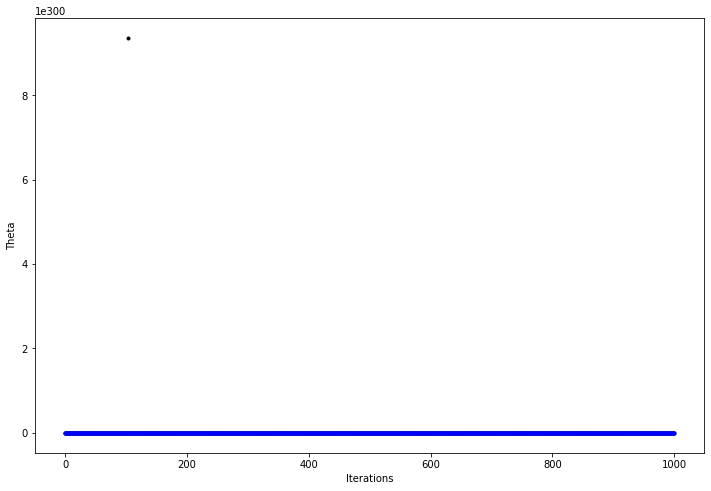

In [436]:
fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []
theta2_history = []
theta3_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])
  theta2_history.append(theta_history[it][2])
  theta3_history.append(theta_history[it][3])

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),theta0_history,'b.', color = 'black')
_=ax.plot(range(n_iter),theta1_history,'b.', color = 'red')
_=ax.plot(range(n_iter),theta2_history,'b.', color = 'green')
_=ax.plot(range(n_iter),theta3_history,'b.', color = 'blue')


# **2. Plot the training error using the training dataset [4pt]**

- plot the training error J(θ0,θ1,θ2,θ3) at every iteration of gradient descent until convergence (in blue color)

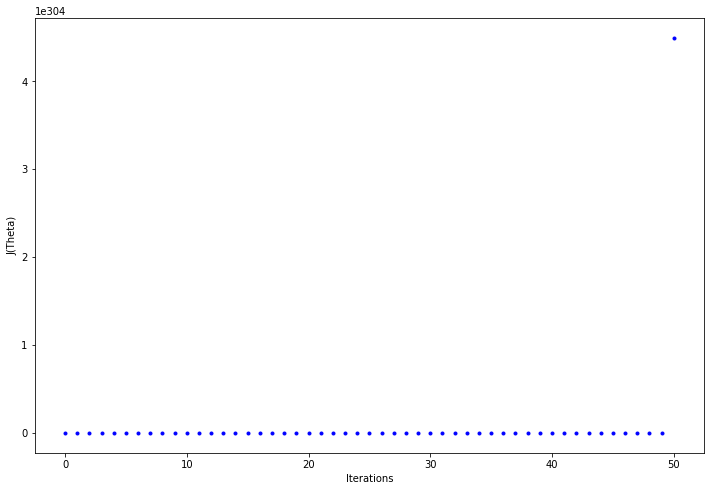

In [437]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

# **3. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence [5pt]**

* plot the testing error J(θ0,θ1,θ2,θ3) at every iteration of gradient descent until convergence (in red color)